In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ERA5

ds = xr.open_dataset('C://Users//frida//OneDrive//Dokument//Klimatdatatillampningar//Project//ERA5_2//ERA5.hourly.1981-2021.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 4, latitude: 4, time: 268872)
Coordinates:
  * longitude  (longitude) float32 13.88 14.13 14.38 14.63
  * latitude   (latitude) float32 56.04 55.79 55.54 55.29
  * time       (time) datetime64[ns] 1981-01-01 ... 2021-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-14 12:13:31 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
#interpolate
#choose months
#calculate hours for one year
#calculate for every year

In [ ]:
#if temp <1.4 hours=hours*0
#if temp >1.5 and <2.4 hours=hours*0.5
# 2.5 - 9.1 hours=hours*1
# 9.2 - 12.4 hours=hours*0.5
# 12.5 - 15.9 hours=hours*0
# 16 - 18 hours=hours*(-0.5)
# >18 hours=hours*(-1)

In [3]:
ds = ds.drop_vars(['latitude', 'longitude'])

In [4]:
data = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 12]))
data

<xarray.Dataset>
Dimensions:  (time: 119304, latitude: 4, longitude: 4)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 ... 2021-12-31T23:00:00
Dimensions without coordinates: latitude, longitude
Data variables:
    t2m      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-14 12:13:31 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
#conditions
temp=data.t2m
hours=data.time.dt.hour
temp=temp - 273.15
temp1=xr.where((temp>= 1.5) & (temp <= 2.4), 0.5 , np.nan)     #changed this
temp2=xr.where((temp>= 2.5) & (temp <= 9.1), 1, np.nan)
temp3=xr.where((temp>= 9.2) & (temp <= 12.4), 0.5 , np.nan)    #changed this
temp4=xr.where((temp>= 16) & (temp <= 18), (-0.5) , np.nan)
temp5=xr.where((temp>= 18), -1 , np.nan)
hours = temp1 + temp2 + temp3 + temp4 + temp5 
hours

<xarray.DataArray 't2m' (time: 119304, latitude: 4, longitude: 4)>
array([[[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       ...,

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]],

       [[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 ... 2021-12-31T23:00:00
Dimensions without coordinates: latitude, longitude

In [6]:
yearsum1 = temp1.groupby('time.year').sum(dim='time')
yearsum2 = temp2.groupby('time.year').sum(dim='time')
yearsum3 = temp3.groupby('time.year').sum(dim='time')
yearsum4 = temp4.groupby('time.year').sum(dim='time')
yearsum5 = temp5.groupby('time.year').sum(dim='time')

In [7]:
yearsum = yearsum1 + yearsum2 + yearsum3 + yearsum4 + yearsum5
yearsum

<xarray.DataArray 't2m' (year: 41, latitude: 4, longitude: 4)>
array([[[ 548. ,  599.5,  634. ,  742.5],
        [ 576. ,  647. ,  784. ,  900.5],
        [ 649.5,  723. ,  866.5,  927.5],
        [ 879. ,  927. ,  930.5,  953.5]],

       [[ 777.5,  842. ,  916. , 1055. ],
        [ 831. ,  935. , 1123.5, 1234.5],
        [ 936.5, 1082. , 1233. , 1283.5],
        [1266.5, 1300. , 1295.5, 1309.5]],

       [[1320. , 1399. , 1470.5, 1548. ],
        [1366. , 1490.5, 1647. , 1792. ],
        [1496. , 1606. , 1801. , 1899. ],
        [1840.5, 1935. , 1955. , 1989. ]],

       [[ 705.5,  769.5,  859. ,  995.5],
        [ 721. ,  841. , 1062.5, 1224. ],
        [ 836.5,  952.5, 1154.5, 1259. ],
        [1110. , 1183. , 1200. , 1229. ]],

...

       [[ 964.5, 1069. , 1149. , 1260. ],
        [1043.5, 1149. , 1354. , 1516. ],
        [1155.5, 1299.5, 1506.5, 1648. ],
        [1549.5, 1648.5, 1669.5, 1714. ]],

       [[1748. , 1809.5, 1897. , 2038. ],
        [1826.5, 1945.5, 2142.5, 2314. ],
        [1972.5, 2121. , 2348. , 2451.5],
        [2371.5, 2461.5, 2490. , 2524. ]],

       [[2332. , 2440.5, 2529. , 2669.5],
        [2411.5, 2557.5, 2720. , 2808. ],
        [2545. , 2687. , 2809.5, 2842.5],
        [2802. , 2841. , 2855. , 2858.5]],

       [[ 920.5,  997. , 1110. , 1321.5],
        [1004.5, 1165.5, 1471. , 1678. ],
        [1177.5, 1387.5, 1705.5, 1799.5],
        [1756. , 1847.5, 1868. , 1892.5]]])
Coordinates:
  * year     (year) int64 1981 1982 1983 1984 1985 ... 2017 2018 2019 2020 2021
Dimensions without coordinates: latitude, longitude

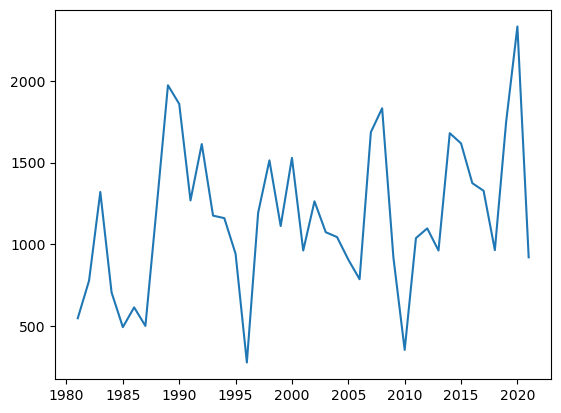

In [8]:
plt.plot(yearsum['year'], yearsum[:, 0, 0])   #I really hope setting the lat and lon to 0 is the right thing to do

In [9]:
#HAMMOZ HISTORICAL

ds2 = xr.open_dataset('C://Users//frida//OneDrive//Dokument//Klimatdatatillampningar//ham_hist_interpo.nc')
ds2

<xarray.Dataset>
Dimensions:  (time: 1446360)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T00:30:00 ... 2014-12-31T23:30:00
    height   float64 ...
    lat      int32 ...
    lon      int32 ...
Data variables:
    tas      (time) float32 ...

In [ ]:
#ds2 = ds2.drop_vars(['lat', 'lon', 'height'])

In [10]:
selectedYears = ds2.sel(time=slice('1981-01-01', '2014-12-31'))
selectedMonths = selectedYears.sel(time=selectedYears.time.dt.month.isin([1, 2, 3, 12]))
selectedMonths

<xarray.Dataset>
Dimensions:  (time: 98928)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T00:29:59.999999488 ... 2014-12-...
    height   float64 ...
    lat      int32 ...
    lon      int32 ...
Data variables:
    tas      (time) float32 ...

In [11]:
#conditions
temp_ham=selectedMonths.tas
hours_ham=selectedMonths.time.dt.hour
temp_ham=temp_ham - 273.15
temp1_ham=xr.where((temp_ham>= 1.5) & (temp_ham <= 2.4), 0.5 , np.nan)     #changed this
temp2_ham=xr.where((temp_ham>= 2.5) & (temp_ham <= 9.1), 1, np.nan)
temp3_ham=xr.where((temp_ham>= 9.2) & (temp_ham <= 12.4), 0.5 , np.nan)    #changed this
temp4_ham=xr.where((temp_ham>= 16) & (temp_ham <= 18), (-0.5) , np.nan)
temp5_ham=xr.where((temp_ham>= 18), -1 , np.nan)
hours_ham = temp1_ham + temp2_ham + temp3_ham + temp4_ham + temp5_ham 
hours_ham

<xarray.DataArray 'tas' (time: 98928)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T00:29:59.999999488 ... 2014-12-...
    height   float64 2.0
    lat      int32 56
    lon      int32 14

In [12]:
yearsum1_ham = temp1_ham.groupby('time.year').sum(dim='time')
yearsum2_ham = temp2_ham.groupby('time.year').sum(dim='time')
yearsum3_ham = temp3_ham.groupby('time.year').sum(dim='time')
yearsum4_ham = temp4_ham.groupby('time.year').sum(dim='time')
yearsum5_ham = temp5_ham.groupby('time.year').sum(dim='time')

In [13]:
yearsum_ham = yearsum1_ham + yearsum2_ham + yearsum3_ham + yearsum4_ham + yearsum5_ham
yearsum_ham['year']

<xarray.DataArray 'year' (year: 34)>
array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)
Coordinates:
    height   float64 2.0
    lat      int32 56
    lon      int32 14
  * year     (year) int64 1981 1982 1983 1984 1985 ... 2010 2011 2012 2013 2014

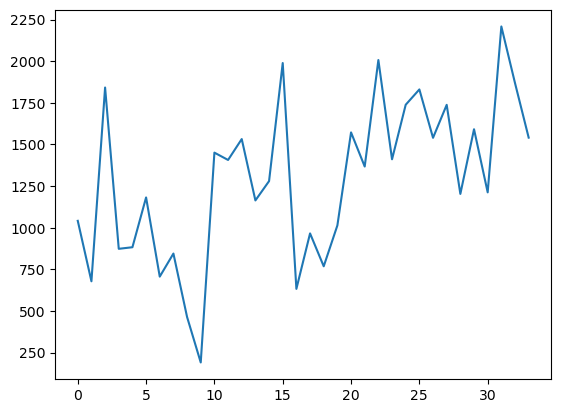

In [14]:
plt.plot(yearsum_ham) #['year'], yearsum[:, 0, 0])

In [15]:
print(ds2['tas'].isel(time=456).values)    #everything is nan....

269.95682
